In [1]:
import sqlite3
import pandas as pd
from datetime import datetime

# CONNECT TO SQLITE DATABASE
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    income INTEGER NOT NULL,
    credit_score INTEGER NOT NULL,
    employment_years INTEGER NOT NULL
)
""")

cursor.execute("""
CREATE TABLE loan_applications (
    application_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    loan_amount INTEGER NOT NULL,
    loan_term INTEGER NOT NULL,
    status TEXT NOT NULL,
    submitted_at TEXT NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
)
""")

conn.commit()

customers = [
    ("Aditi", 45000, 720, 3),
    ("Rahul", 28000, 650, 1),
    ("Sneha", 60000, 780, 5)
]

cursor.executemany("""
INSERT INTO customers (name, income, credit_score, employment_years)
VALUES (?, ?, ?, ?)
""", customers)

loans = [
    (1, 200000, 24, "submitted", datetime.now().strftime("%Y-%m-%d %H:%M:%S")),
    (2, 150000, 36, "submitted", datetime.now().strftime("%Y-%m-%d %H:%M:%S")),
    (3, 300000, 48, "submitted", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
]

cursor.executemany("""
INSERT INTO loan_applications
(customer_id, loan_amount, loan_term, status, submitted_at)
VALUES (?, ?, ?, ?, ?)
""", loans)

conn.commit()


query = """
SELECT
    c.customer_id,
    c.name,
    c.income,
    c.credit_score,
    c.employment_years,
    l.loan_amount,
    l.loan_term,
    CASE
        WHEN c.credit_score >= 700
        AND c.income >= 30000
        AND c.employment_years >= 2
        THEN 'Eligible'
        ELSE 'Not Eligible'
    END AS eligibility_status
FROM customers c
JOIN loan_applications l
ON c.customer_id = l.customer_id
"""

df = pd.read_sql(query, conn)
df


,customer_id,name,income,credit_score,employment_years,loan_amount,loan_term,eligibility_status
0,1,Aditi,45000,720,3,200000,24,Eligible
1,2,Rahul,28000,650,1,150000,36,Not Eligible
2,3,Sneha,60000,780,5,300000,48,Eligible


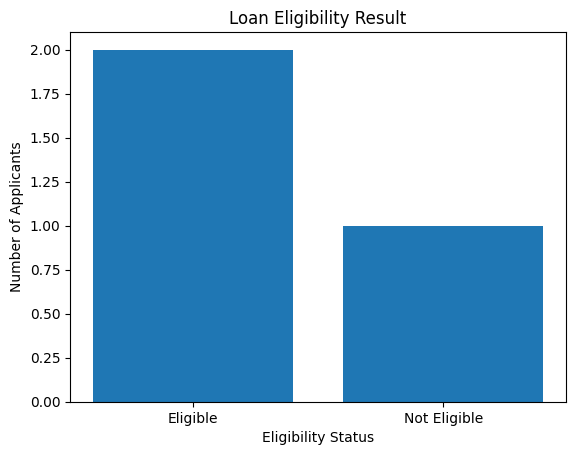

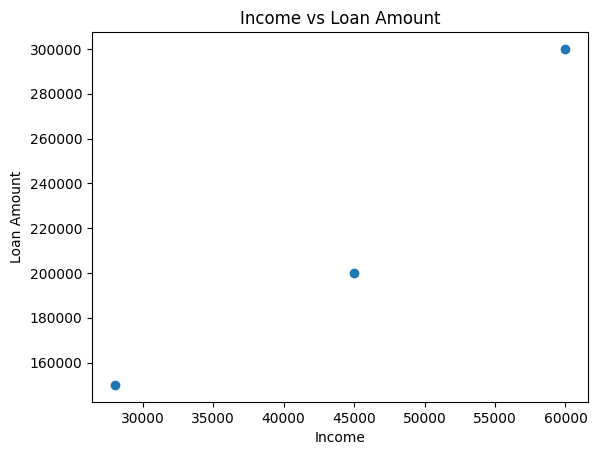

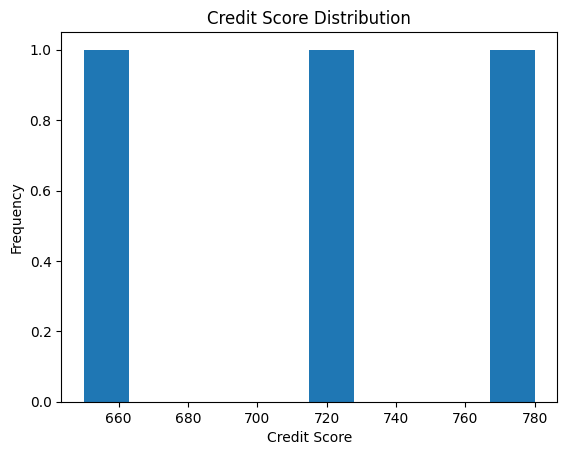

In [2]:

import matplotlib.pyplot as plt

# 1. ELIGIBILITY COUNT BAR CHART
eligibility_counts = df['eligibility_status'].value_counts()

plt.figure()
plt.bar(eligibility_counts.index, eligibility_counts.values)
plt.xlabel("Eligibility Status")
plt.ylabel("Number of Applicants")
plt.title("Loan Eligibility Result")
plt.show()


# 2. INCOME VS LOAN AMOUNT SCATTER PLOT
plt.figure()
plt.scatter(df['income'], df['loan_amount'])
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs Loan Amount")
plt.show()


# 3. CREDIT SCORE DISTRIBUTION
plt.figure()
plt.hist(df['credit_score'])
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Credit Score Distribution")
plt.show()
